<a href="https://colab.research.google.com/github/niconaufal21/MachineLearning/blob/master/Nico_Naufal_Tugas_3__Summit_of_KM_06_01_01_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Define Model dengan cara sequential

Menerima 8 input

Memiliki 1 hidden layer dengan 10 neuron

memiliki 1 output layer dengan 1 neuron


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# define the model
model = Sequential()
model.add(Dense(10, input_shape=(8,)))
model.add(Dense(1))

Menerima 10 input

Memiliki 6 hidden layer
 
memiliki 1 output layer dengan 1 neuron


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# define the model
model = Sequential()
model.add(Dense(100, input_shape=(10,)))
model.add(Dense(80))
model.add(Dense(30))
model.add(Dense(10))
model.add(Dense(5))
model.add(Dense(1))

### Define Model dengan cara functional

Menerima 8 input

Memiliki 1 hidden layer dengan 10 neuron

memiliki 1 output layer dengan 1 neuron

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
# define the layers
x_in = Input(shape=(8,))
x = Dense(10)(x_in)
x_out = Dense(1)(x)
# define the model
model = Model(inputs=x_in, outputs=x_out)

# Membangun model Neural Network dengan Keras

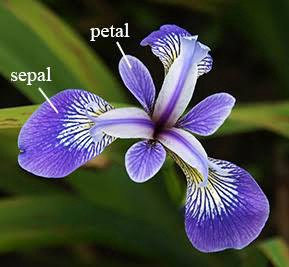

Run dari sini untuk latihan

In [ ]:
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
# load dataset
path = 'https://raw.githubusercontent.com/achmatim/data-mining/main/Dataset/iris.csv'
df = read_csv(path)

df
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# split data 
X, y = df.values[:, :-1], df.values[:, -1]
# ubah tipe data menjadi float32
X = X.astype('float32')

# encode string menjadi integer
y = LabelEncoder().fit_transform(y)

# split dataset menjadi 80% data training dan 20% data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# memperoleh banyaknya jumlah fitur pada input
n_features = X_train.shape[1]
print(n_features)

(120, 4) (30, 4) (120,) (30,)
4


## Latihan 1 
Membangun model

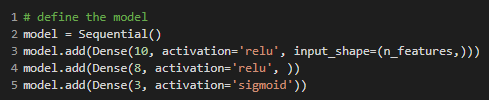




In [ ]:
model = Sequential()
model.add(Dense(10,activation = 'relu', input_shape=(n_features,)))
model.add(Dense(8, activation='relu',))
model.add(Dense(3,activation='sigmoid'))

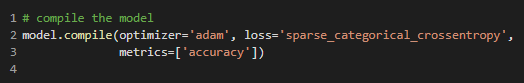

In [ ]:

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


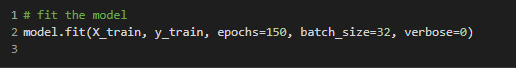

In [ ]:
# TODO 3 : Ketik kode di atas pada cell ini

# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

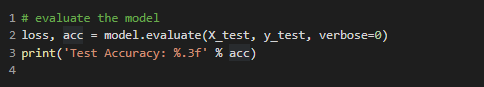

In [ ]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test,verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 1.000


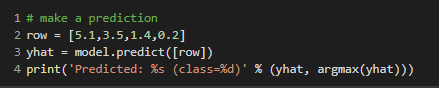

In [ ]:

row = [5.1,3.5,1.4,0.2]
yhat = model.predict([row])
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

Predicted: [[0.995263   0.85045207 0.0162797 ]] (class=0)


# Visualize Deep Learning Model

### Model Text Description

In [ ]:
# Contoh 
from tensorflow.keras.layers import Dense
# define model1
model1 = Sequential()
model1.add(Dense(100, input_shape=(10,)))
model1.add(Dense(80))
model1.add(Dense(30))
model1.add(Dense(10))
model1.add(Dense(5))
model1.add(Dense(1))

In [ ]:
# Model text description model 1
model1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 100)               1100      
_________________________________________________________________
dense_29 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_30 (Dense)             (None, 30)                2430      
_________________________________________________________________
dense_31 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_32 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 6         
Total params: 11,981
Trainable params: 11,981
Non-trainable params: 0
__________________________________________________

### Model Architecture Plot

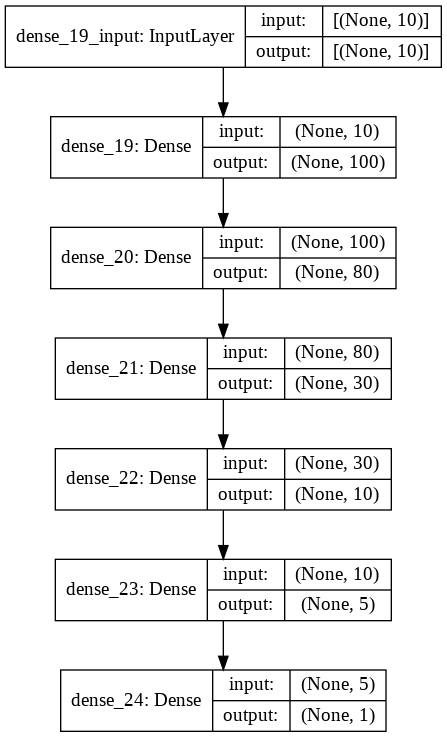

In [ ]:
# Contoh model architecture plot
from tensorflow.keras.utils import plot_model
# summarize model 1
plot_model(model1, 'model_1_summary.png', show_shapes=True)

### Plotting Learning curves

In [ ]:
# Contoh plotting learning curves
# define model 2 
model2 = Sequential()
model2.add(Dense(10, activation='relu', input_shape=(n_features,)))
model2.add(Dense(8, activation='relu', ))
model2.add(Dense(3, activation='softmax'))

# compile model 2
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit model 2
history = model2.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0,validation_split=0.3)

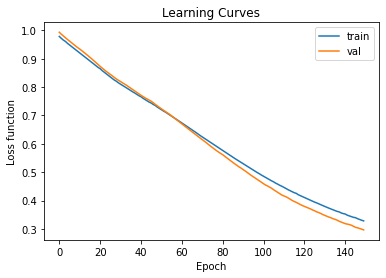

In [ ]:
from matplotlib import pyplot
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss function')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

### Save and Load Model

In [ ]:
# save model 2 ke dalam file dengan nama "model_2.h5"
model2.save('model_2.h5')

Load Model

In [ ]:
from tensorflow.keras.models import load_model
# load model 2 untuk digunakan lagi dari file
model3 = load_model('model_2.h5')

loss, acc = model3.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy_model_3: %.3f' % acc)

# Buat prediksi
row = [0.1,0.5,7.4,7.2]
yhat = model3.predict([row])
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

Test Accuracy_model_3: 0.967
Predicted: [[3.1177222e-10 9.6614640e-06 9.9999034e-01]] (class=2)


# Latihan 2

1. Tampilkan deskripsi text dari model pada latihan 1
2. Plot arsitektur dari model pada latihan 1
3. Save model pada latihan 1 dengan nama "nama_kelas.h5"
4. Load model dari model yg udah disimpan sebelumnya lalu evaluate

In [ ]:

from tensorflow.keras.layers import Dense
# define model1
model1 = Sequential()
model1.add(Dense(1000, input_shape=(100,)))
model1.add(Dense(800))
model1.add(Dense(300))
model1.add(Dense(100))
model1.add(Dense(50))
model1.add(Dense(10))

In [ ]:
# Model text description model 1
model1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 1000)              101000    
_________________________________________________________________
dense_35 (Dense)             (None, 800)               800800    
_________________________________________________________________
dense_36 (Dense)             (None, 300)               240300    
_________________________________________________________________
dense_37 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_38 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_39 (Dense)             (None, 10)                510       
Total params: 1,177,760
Trainable params: 1,177,760
Non-trainable params: 0
____________________________________________

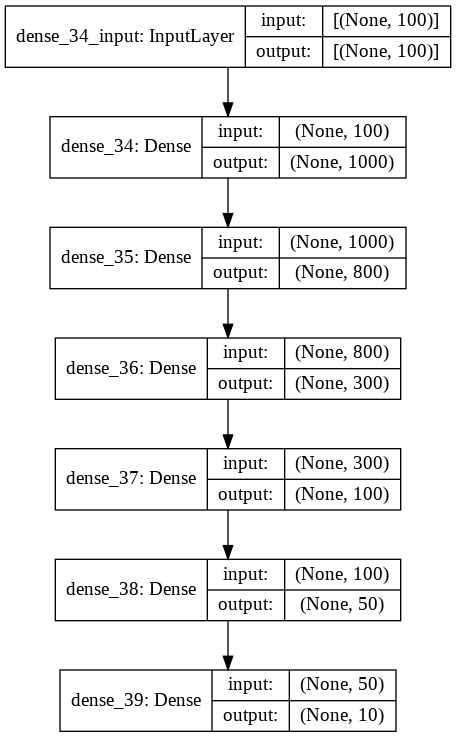

In [ ]:

from tensorflow.keras.utils import plot_model
# summarize model 1
plot_model(model1, 'model_1_summary.png', show_shapes=True)

In [ ]:
# save model 2 ke dalam file dengan nama "model_2.h5"
model2.save('model_summit.h5')

In [ ]:
from tensorflow.keras.models import load_model
# load model 2 untuk digunakan lagi dari file
model2 = load_model('model_summit.h5')

loss, acc = model3.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy_model_3: %.3f' % acc)

# Buat prediksi
row = [0.1,0.5,7.4,7.2]
yhat = model3.predict([row])
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

Test Accuracy_model_3: 0.967
Predicted: [[3.1177222e-10 9.6614640e-06 9.9999034e-01]] (class=2)


# Get Better Model Performance

### Menggunakan Dropout untuk mengurangi overfitting


In [ ]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(100, input_shape=(10,)))
model.add(Dropout(0.5))
model.add(Dense(80))
model.add(Dropout(0.5))
model.add(Dense(30))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Dense(1))

### Mempercepat Training dengan Batch Normalization

In [ ]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential()
model.add(Dense(100, input_shape=(10,)))
model.add(Dense(80))
model.add(BatchNormalization())
model.add(Dense(30))
model.add(BatchNormalization())
model.add(Dense(10))
model.add(BatchNormalization())
model.add(Dense(5))
model.add(Dense(1))

# Latihan 2B: lanjutkan dengan menerapkan dropout dan batch normalization pada model sebelumnya dan evaluate ulang lalu analisis hasilnya

### Dropout

In [ ]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(100, input_shape=(10,)))
model.add(Dropout(0.5))
model.add(Dense(80))
model.add(Dropout(0.5))
model.add(Dense(30))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Dense(1))

### Batch Normalization

In [ ]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential()
model.add(Dense(100, input_shape=(10,)))
model.add(Dense(80))
model.add(BatchNormalization())
model.add(Dense(30))
model.add(BatchNormalization())
model.add(Dense(10))
model.add(BatchNormalization())
model.add(Dense(5))
model.add(Dense(1))

In [79]:

loss, acc = model3.evaluate(X_test, y_test, verbose=1)
print('Test Accuracy_model_3: %.3f' % acc)

# Buat prediksi
row = [2.1,3.5,5.4,4.2]
yhat = model3.predict([row])
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

1/1 [==============================] - 0s 12ms/step - loss: 0.3148 - accuracy: 0.9667
Test Accuracy_model_3: 0.967
Predicted: [[1.8680461e-06 3.3827093e-03 9.9661547e-01]] (class=2)


# Activity 

### Fashion-MNIST adalah kumpulan dataset terdiri dari 28x28 gambar grayscale dari 70.000 produk fashion dari 10 kategori, dengan 7.000 gambar per kategori.Training set memiliki 60.000 gambar dan testing set memiliki 10.000 gambar. 


<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

### Buat model neural network untuk menyelesaikan permasalahan klasifikasi pada dataset Fashion-MNIST

### Silahkan buka link berikut, kemudian save as copy 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1LAkpMgD0IRfgUQP9CcGpkgMDt-QXY_uK?usp=sharing)
